<font size="+3" color=DarkBlue><b> <left>Image Classification - Intel Image Classification Dataset (Extensible)</u></center></b></font>

<font size="+2" color=DarkBlue><b> <left>(Adaptable to other image classification problems)</u></center></b></font>


# NOTES


Foud a bug in the section where I run the test set through the tuned model! Was printing the Confusuon matrix before the test had been done!!! All V05 efforts need to be re-run!!!!! 
Corrected/test 28 FEB 2024. Now need to tiday and document and run a couple of iterations.


# Objective

The aim of this kernel is to provide all the tips and tricks required to train image classification model on any given image dataset in a single page.This kernel will hold almost all steps and steps required to implement image classification algorithm using SOTA such as ResNET on any given dataset.It could be a great time saver for you.Just utilize it anytime when you are working on Image Classification.

I have learned them from [FastAI](https://docs.fast.ai/)

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is Deep Learning ?](#1)
* [2. What is CNN ?](#2)

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#3)
* [2. Import Libraries ](#4)
    
<font color="blue" size=+1><b> Load and view your data </b></font>
* [1. Setting up path for training data ](#5)
* [2. Data Loading For training ](#6)
* [3. Data Explorations ](#7)
* [4. Print Classes present in the data ](#8)

<font color="blue" size=+1><b> Create and train a model </b></font>
* [1. Create Models ](#9)
* [2. Train Model ](#11)
* [3. Finding LR ](#10)
* [4. Finetuning HyperParameter](#12)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#13)
* [2. Prediction Using Trained Model](#14)
* [3. Save and Load Model](#15)
* [4. Sources](#16)

<a id="1"></a>
<font color="blue" size=+2.5><b>1.1  What is Deep Learning ?</b></font>
<br/>
<br/>
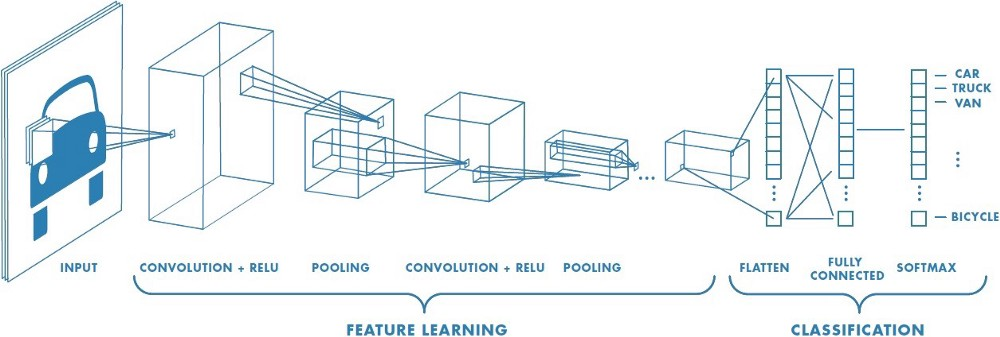
<br/>
<br/>

*Deep learning is a subset of machine learning concerned with the emulation of human brain activities in software programs using layers of artificial neural networks (ANN), which work similar to the human brain at some levels.*

<a id="2"></a>
<font color="blue" size=+2.5><b>1.2 What is CNN ?</b></font>
<br/>
<br/>
CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.

<a id="3"></a>
<font color="blue" size=+2.5><b>2.1 Installation of Libraries </b></font>

## !pip install fastai

<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [1]:
# Standard library imports
import os
from datetime import datetime
from pathlib import Path
import sys
import winsound

# Third-party library imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.exceptions import UndefinedMetricWarning


# FastAI library imports
import fastai                                   ### https://docs.fast.ai/
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate

<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Confirm Python/Library Versions</b></font>

In [2]:
separator_char_repeat = 150
print('▬' * separator_char_repeat)
print("Python Version:", sys.version)
print("FastAI Version: ",fastai.__version__)
print("Pandas Version:", pd.__version__)
print("NumPy Version:", np.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("Seaborn Version:", sns.__version__)
print("OpenCV Version:", cv2.__version__)

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
Python Version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
FastAI Version:  2.7.14
Pandas Version: 2.1.1
NumPy Version: 1.24.3
Matplotlib Version: 3.8.0
Seaborn Version: 0.12.2
OpenCV Version: 4.9.0


<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Function to calculate and print elapsed time</b></font>

In [3]:
def print_elapsed_time(process_step, start_time, end_time):
    """
    Print the elapsed time for a given process step from start_time to end_time in Days, Hours, Minutes, and Seconds.
    
    Parameters:
    - start_time: datetime instance when the timer starts
    - end_time: datetime instance when the timer ends
    - process_step: string describing the process step
    """
    # Calculate the time difference
    time_diff = end_time - start_time

    # Extract days, hours, minutes, and seconds
    days = time_diff.days
    seconds = time_diff.seconds
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    seconds = seconds % 60

    # Print the process step and the elapsed time in the specified format
    print(f"▲ Process Step: {process_step}")
    print(f"▲ Elapsed time: {days} Days, {hours} Hours, {minutes} Minutes, {seconds} Seconds")
    # Play a simple beep sound (If running in the backgroundd, useful to alert step complete)
    ### SD Temp removal for night run ### winsound.Beep(frequency=440, duration=3000)  # Frequency in Hz, Duration in milliseconds

<a id="4"></a>
<font color="blue" size=+2.5><b>2.2 Enhance FastAI learn.lr_find and recorder.plot_lr_find (Optional)</b></font>

In [4]:
__all__ = []

# Cell
@patch
def plot_lr_find(self:Recorder, suggestions= False,skip_end=5, lr_min=None, lr_steep=None):
    "Plot the result of an LR Finder test (won't work if you didn't do `learn.lr_find()` before)"
    lrs    = self.lrs    if skip_end==0 else self.lrs   [:-skip_end]
    losses = self.losses if skip_end==0 else self.losses[:-skip_end]

    if suggestions:
        lr_min_index = min(range(len(lrs)), key=lambda i: abs(lrs[i]-lr_min))
        lr_steep_index = min(range(len(lrs)), key=lambda i: abs(lrs[i]-lr_steep))

    fig, ax = plt.subplots(1,1)
    ax.plot(lrs, losses)
    if suggestions:
        ax.plot(lr_min,L(losses)[lr_min_index],'ro')
        ax.plot(lr_steep,L(losses)[lr_steep_index],'ro')
    ax.set_ylabel("Loss")
    ax.set_xlabel("Learning Rate")
    ax.set_xscale('log')

@patch
def lr_find(self:Learner, start_lr=1e-7, end_lr=10, num_it=100, stop_div=True, show_plot=True, suggestions=True):
    "Launch a mock training to find a good learning rate, return lr_min, lr_steep if `suggestions` is True"
    n_epoch = num_it//len(self.dls.train) + 1
    cb=LRFinder(start_lr=start_lr, end_lr=end_lr, num_it=num_it, stop_div=stop_div)
    with self.no_logging(): self.fit(n_epoch, cbs=cb)
    if suggestions:
        lrs,losses = tensor(self.recorder.lrs[num_it//10:-5]),tensor(self.recorder.losses[num_it//10:-5])
        if len(losses) == 0: return
        lr_min = lrs[losses.argmin()].item()
        grads = (losses[1:]-losses[:-1]) / (lrs[1:].log()-lrs[:-1].log())
        lr_steep = lrs[grads.argmin()].item()
        if show_plot: self.recorder.plot_lr_find(suggestions=True, lr_min =lr_min/10., lr_steep=lr_steep)
    else:
        if show_plot: self.recorder.plot_lr_find()

    if suggestions:
        return SuggestedLRs(lr_min/10.,lr_steep)

<a id="5"></a>
<font color="blue" size=+2.5><b>3.1 Setting up path for training data</b></font>

**Point to be Noted: Number of elements in a list of path is same as number of classes you have**

In [5]:
# Get the current working directory
current_path = os.getcwd()
print("Current Path: ", current_path)



Current Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1


In [6]:
dataset_train_path = r'intel image classification\seg_train'
full_dataset_train_path = os.path.join(current_path, dataset_train_path)
print('▬' * separator_char_repeat)
print("Full Dataset Train Path: ", full_dataset_train_path)

# List sub-folders in the full_dataset_train_path
train_sub_folders = [f.name for f in os.scandir(full_dataset_train_path) if f.is_dir()]
print("Sub-folders in the dataset train path:",train_sub_folders)

total_files = 0

# Iterate over each sub-folder
for sub_folder in train_sub_folders:
    # Construct the path to the sub-folder
    folder_path = os.path.join(full_dataset_train_path, sub_folder)
    # List all files in the sub-folder
    files = [f.name for f in os.scandir(folder_path) if f.is_file()]
    # Count the number of files in this sub-folder
    num_files = len(files)
    # Print the number of files with thousands separator
    print(f"Number of files in {sub_folder}: {num_files:,}")
    # Add the count to the total number of files
    total_files += num_files

# Print the total number of files found with thousands separator
print(f"Total number of files found: {total_files:,}")


▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
Full Dataset Train Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\intel image classification\seg_train
Sub-folders in the dataset train path: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of files in buildings: 2,191
Number of files in forest: 2,271
Number of files in glacier: 2,404
Number of files in mountain: 2,512
Number of files in sea: 2,274
Number of files in street: 2,382
Total number of files found: 14,034


In [7]:
dataset_test_path = r'intel image classification\seg_test'
full_dataset_test_path = os.path.join(current_path, dataset_test_path)
print('▬' * separator_char_repeat)
print("Full Dataset Test Path: ", full_dataset_test_path)

# List sub-folders in the full_dataset_test_path
test_sub_folders = [f.name for f in os.scandir(full_dataset_test_path) if f.is_dir()]
print("Sub-folders in the dataset test path:",test_sub_folders)

total_files = 0

# Iterate over each sub-folder
for sub_folder in test_sub_folders:
    # Construct the path to the sub-folder
    folder_path = os.path.join(full_dataset_test_path, sub_folder)
    # List all files in the sub-folder
    files = [f.name for f in os.scandir(folder_path) if f.is_file()]
    # Count the number of files in this sub-folder
    num_files = len(files)
    # Print the number of files with thousands separator
    print(f"Number of files in {sub_folder}: {num_files:,}")
    # Add the count to the total number of files
    total_files += num_files

# Print the total number of files found with thousands separator
print(f"Total number of files found: {total_files:,}")

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
Full Dataset Test Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\intel image classification\seg_test
Sub-folders in the dataset test path: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Number of files in buildings: 437
Number of files in forest: 474
Number of files in glacier: 553
Number of files in mountain: 525
Number of files in sea: 510
Number of files in street: 501
Total number of files found: 3,000


In [8]:
dataset_predict_path = r'intel image classification\seg_pred'
full_dataset_predict_path = os.path.join(current_path, dataset_predict_path)
print('▬' * separator_char_repeat)
print("Full Dataset Predict Path: ", full_dataset_predict_path)

# List sub-folders in the full_dataset_predict_path
predict_sub_folders = [f.name for f in os.scandir(full_dataset_predict_path) if f.is_dir()]
print("Sub-folders in the dataset predict path:", predict_sub_folders)

# Correcting the previous mistake by defining 'predict_files'
# List all files in the directory directly
predict_files = [f.name for f in os.scandir(full_dataset_predict_path) if f.is_file()]

# Count the number of files directly within the directory
total_files = len(predict_files)

# Print the number of files, using thousands separator for readability
print(f"Total number of files found: {total_files:,}")

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
Full Dataset Predict Path:  C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\intel image classification\seg_pred
Sub-folders in the dataset predict path: []
Total number of files found: 7,301


<a id="6"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For training/validation</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in this case)
* Test data can also be added but it's optional

In [9]:
target_image_size = 224         # Pre-trained models, such as ResNet expect input images 224x224 pixels
validation_percentage = 0.2     # Set aside 20% of randomly chosen images for validation/hyperparamter tuning 


data = ImageDataLoaders.from_folder(full_dataset_train_path, train='.', valid_pct=validation_percentage,
                                    item_tfms=Resize(target_image_size), 
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)], 
                                    num_workers=8)

<a id="6"></a>
<font color="blue" size=+2.5><b>3.2 Data Loading For testing</b></font>
<br/>

**Things to be remember:**
* Decide validation percentage ( 0.2 => 20% )
* Provide path for training data
* [Decide augmentations criteria (optional)](https://www.kaggle.com/init27/introduction-to-image-augmentation-using-fastai/)
* Decide image size (which is 224 in my case)
* Test data can also be added but it's optional

target_image_size = 224         # Pre-trained models, such as ResNet expect input images 224x224 pixels
validation_percentage = 0.2     # Set aside 20% of randomly chosen images for validation 


data = ImageDataLoaders.from_folder(full_dataset_train_path, train='.', valid_pct=validation_percentage,
                                    item_tfms=Resize(target_image_size), 
                                    batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)], 
                                    num_workers=4)

<a id="7"></a>
<font color="blue" size=+2.5><b>3.3 Data Explorations</b></font>
<br/>

*Our image dataset is stored as .jpg files in 2 different folders, with each folder bearing the name of model of the images contained in the folder. We use the ImageDataBunch.from_folder() function to load the images and assign labels the images based on the name of the folder they’re read from.*

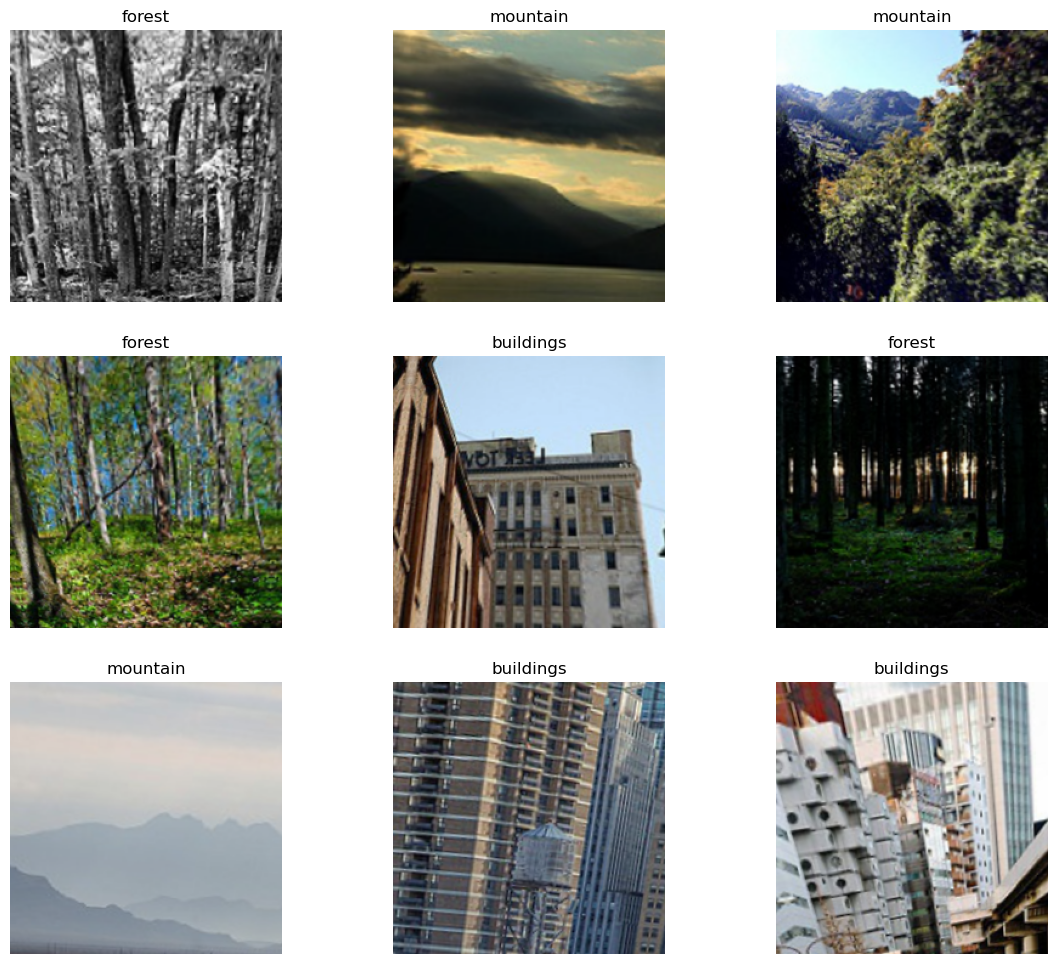

In [10]:
## data.show_batch(nrows=3, figsize=(7,6),recompute_scale_factor=True)
data.show_batch(nrows=3, figsize=(14,12))

<a id="8"></a>
<font color="blue" size=+2.5><b>3.4 Print Classes present in the data</b></font>
<br/>

* Training dataset
* Validation dataset

In [11]:
data

In [12]:
# Print the names of classes and the number of classes
print('▬' * separator_char_repeat)
print("Number of classes:", len(data.vocab))
print("Classes found:", data.vocab)
# Print the number of classes in the dataset

# Function to calculate class distribution
def calculate_class_distribution(dataloader, vocab):
    class_counts = {label: 0 for label in vocab}
    for _, y in dataloader:
        for label in y:
            class_counts[vocab[label]] += 1
    return class_counts

# Calculate and print class distribution for the training set
train_class_distribution = calculate_class_distribution(data.train, data.vocab)
print("Training - Training set class distribution:", train_class_distribution)
# Print the size of the training dataset
print("Training - Total Size of training dataset:", len(data.train_ds))

# Calculate and print class distribution for the validation set
valid_class_distribution = calculate_class_distribution(data.valid, data.vocab)
print("Validation - Validation set class distribution:", valid_class_distribution)
# Print the size of the validation dataset
print("Validation - Total Size of validation dataset:", len(data.valid_ds))

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
Number of classes: 6
Classes found: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
Training - Training set class distribution: {'buildings': 1740, 'forest': 1803, 'glacier': 1940, 'mountain': 1989, 'sea': 1841, 'street': 1887}
Training - Total Size of training dataset: 11228
Validation - Validation set class distribution: {'buildings': 447, 'forest': 458, 'glacier': 461, 'mountain': 519, 'sea': 430, 'street': 491}
Validation - Total Size of validation dataset: 2806


<a id="9"></a>
<font color="blue" size=+2.5><b>4.1 Create Model</b></font>
<br/>
* We now use a pre-trained ResNet18 Convolutional Neural Net model, and use transfer learning to learn weights of only the last layer of the network.
* Why Transfer learning? Because with transfer learning, you begin with an existing (trained) neural network used for image recognition — and then tweak it a bit (or more) here and there to train a model for your particular use case. And why do we do that? Training a reasonable neural network would mean needing approximately 300,000 image samples, and to achieve really good performance, we’re going to need at least a million images.
* In our case, we have approximately 2500 images in our training set — you have one guess to decide if that would have been enough if were to train a neural net from scratch.
* We use the create_cnn() function for loading a pre-trained ResNet18 network, that was trained on around a million images from the ImageNet database.

In [13]:
print('▬' * separator_char_repeat)
process_step = "Create Model"
start_time = datetime.now()

# Initialize a learner for a computer vision task using a pre-trained ResNet-18 model

learn = vision_learner(
    data,                                          # Data object containing training and validation datasets
    models.resnet18,                               # Pre-trained model architecture (ResNet-18)
    metrics=[
        accuracy, 
        Precision(average='macro'),                # Adjusted Precision for multi-class, averaged 'macro'
        Recall(average='macro')                    # Adjusted Recall for multi-class, averaged 'macro'
    ],                                             # List of metrics to evaluate during training
    model_dir=Path('../model/working'),            # Sub-directory to save model weights
    path=Path(".")                                 # Base path for relative path operations within the learner
)

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬
▲ Process Step: Create Model
▲ Elapsed time: 0 Days, 0 Hours, 0 Minutes, 0 Seconds


<a id="9"></a>
<font color="blue" size=+2.5><b>4.1 Print Model Summary</b></font>
<br/>
* NB Need to explain what we have below...

In [14]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

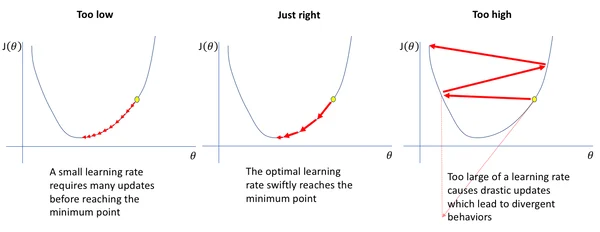

Image source: https://www.jeremyjordan.me/nn-learning-rate/

<a id="10"></a>
<font color="blue" size=+2.5><b>4.2 Finding LR</b></font>
<br/>

▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬▬


NameError: name 'SuggestedLRs' is not defined

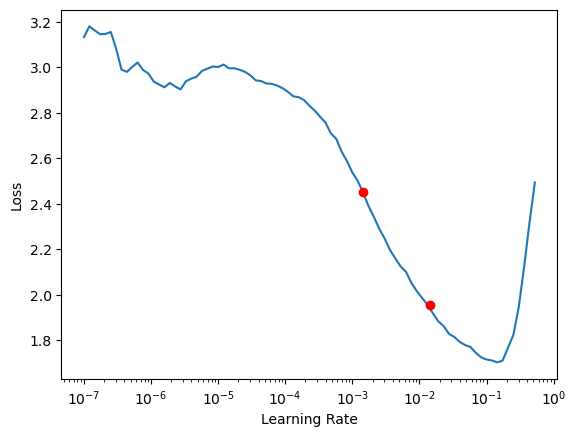

In [15]:
print('▬' * separator_char_repeat)
process_step = "Finding Learning Rate"
start_time = datetime.now()

# Find the optimal learning rate
learn.lr_find()

lr_recommendations = learn.lr_find()  # This will now show a plot with suggestions if you have the `show_plot` parameter set to True

# If `suggestions=True`, the method returns suggested learning rates
if lr_recommendations is not None:
    print(f"Suggested minimum learning rate: {lr_recommendations.lr_min:.2e}")
    print(f"Suggested steepest learning rate: {lr_recommendations.lr_steep:.2e}")

# Now you can use the suggested learning rates to fit your model
##### learn.fit_one_cycle(5, lr_max=suggestions.lr_steep)

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

# To plot the learning rate graph
learn.recorder.plot_lr_find()

# Now, annotate the graph with lr_min and lr_steep values
plt.axvline(x=lr_min, color='red', linestyle='--', label=f'lr_min: {lr_min:.1e}')
plt.axvline(x=lr_steep, color='green', linestyle='--', label=f'lr_steep: {lr_steep:.1e}')

# Adding labels to the plot for clarity
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plot with annotations
plt.show()

<a id="11"></a>
<font color="blue" size=+2.5><b>4.3 Train Model</b></font>
<br/>

In [ ]:
process_step = "Train Model"
start_time = datetime.now()

training_epochs = 2    # NB 20 is normal setting, reduced to 1 or 2 for development purposes
learning_rate_layers_earliest = 1e-3
learning_rate_layers_last = 1e-1

learn.fit_one_cycle(training_epochs, slice(learning_rate_layers_earliest,learning_rate_layers_last))

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)


<a id="12"></a>
<font color="blue" size=+2.5><b>4.4 Hyper Parameter Tuning</b></font>


#### Unfreeze all the layers of the model.
Initially, when using transfer learning, the pre-trained layers are frozen, meaning their weights are not updated during training.
Unfreezing them allows all the layers' weights to be updated during training based on the new data.

In [ ]:
print('▬' * separator_char_repeat)
process_step = "Unfreeze Layer Weights"
start_time = datetime.now()

# Before unfreezing
print("Before unfreezing:")
for name, param in learn.model.named_parameters():
    print(f"{name}: {param.requires_grad}")

learn.unfreeze()

# After unfreezing
print("\nAfter unfreezing:")
for name, param in learn.model.named_parameters():
    print(f"{name}: {param.requires_grad}")

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

#### Fit the model using the "1cycle" learning rate policy for 20 epochs.
The "One cycle" policy is a training method that starts with a lower learning rate, gradually increases it, and then decreases it.
This approach can help in achieving better performance and faster convergence.
#### Parameters:
20: Number of epochs to train for. An epoch is one complete pass through the entire training dataset.
slice(1e-4,1e-3): This sets the learning rates for the unfrozen layers.
The first value (1e-4 or 0.0001) is the starting learning rate for the earliest layers.
The second value (1e-3 or 0.001) is the learning rate for the last layer.
The layers in between will have learning rates that gradually increase from the first value to the second value.
This technique is known as discriminative learning rates, where earlier layers (which capture more general information)
have smaller learning rates, and later layers (more specific to the current task) have higher learning rates.

In [ ]:
process_step = "One cycle training"
start_time = datetime.now()

tuning_epochs = 1   ### NB 20 is normal setting, reduced to 1 or 2 for development purposes
### TUE, 27 FEB 2024 - Trying with more conservative learning rates
## learning_rate_layers_earliest = 1e-5               # More conservative
## learning_rate_layers_last = 1e-3                   # Original 1e-3
learning_rate_layers_earliest = 1e-4               # More Agressive
learning_rate_layers_last = 1e-3                   # Original 1e-3

learn.fit_one_cycle(tuning_epochs, slice(learning_rate_layers_earliest,learning_rate_layers_last))

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

In [ ]:
learn.recorder.plot_loss()

Axes of the Graph:
X-axis: Represents the training iterations or batches. If the number of iterations is high, it may represent the number of epochs (complete passes through the entire training dataset).
Y-axis: Represents the loss value. This is a measure of how well the model is performing; lower values indicate better performance.
Interpretation of the Graph:
Training Loss (Blue Line): This shows how the model's loss decreases as it learns from the training dataset. Fluctuations can occur due to the stochastic nature of the optimization algorithm (usually stochastic gradient descent or its variants). Ideally, this should trend downwards as the model becomes better at predicting the training data.

Validation Loss (Orange Line): This shows the loss calculated on a separate dataset that is not used for training (the validation set). This is a good indicator of how well the model is generalizing to unseen data. Unlike the training loss, the validation loss is not directly used for updating the model's weights and is typically evaluated at the end of each epoch.

Key Observations:
If the training loss is decreasing but the validation loss starts to increase, it could be a sign of overfitting, meaning the model is learning to predict the training data too well, including noise or patterns that don't generalize to new data.
The graph shows the validation loss as a straight line, which suggests that only the final validation loss at the end of each epoch is plotted, rather than after each training batch.
The validation loss is lower than the training loss initially, which is uncommon. Typically, you'd expect the validation loss to be higher than the training loss because the model is trained on the training data, not the validation data. However, this can happen in certain cases, such as:
The validation set is easier for the model to predict than the training set.
Different data preprocessing or augmentation is applied to the training set but not the validation set.
Dropout or other regularization techniques that are only active during training (which can cause higher training loss as the model's effective capacity is reduced).
In general, you want both the training and validation loss to decrease and stabilize. However, it's the validation loss that you should monitor more closely for the reasons stated above.

# <a id="13"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>

Model performance can be validated in different ways. One of the popular methods is using the confusion matrix. Diagonal values of the matrix indicate correct predictions for each class, whereas other cell values indicate a number of wrong predictions.

In [ ]:
process_step = "Interpret Results/Confusion Matrix"
start_time = datetime.now()

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

In [ ]:
# Validate the model and print the results
validation_results = learn.validate()

# The first value is always the validation loss
val_loss = validation_results[0]

# The remaining values are the metrics
val_metrics = validation_results[1:]

print('▬' * separator_char_repeat)
print(f'Validation Loss: {val_loss}')
# Print each metric value
for i, metric in enumerate(learn.metrics):
    print(f'{metric.name}: {val_metrics[i]}')

#### Method interp.plot_top_losses is a function from the FastAI library
When you run this function, it will output a plot with the specified number of images. For each of these images, it will show:
The predicted class.
The actual class.
The loss associated with the prediction.
The probability assigned to the predicted class.

In [ ]:
# Suppress only UndefinedMetricWarnings
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Print the first n number of images with highest loss
number_images_to_plot = 6
interp.plot_top_losses(number_images_to_plot,figsize = (25,15))

<a id="14"></a>
<font color="blue" size=+2.5><b>5.2 Prediction Using Trained Model</b></font>

In [ ]:
# Construct the path to the image you want to predict
image_path = os.path.join(full_dataset_test_path, 'glacier', '21982.jpg')

# Open the image using FastAI's method (ensure you use the correct function based on your version of FastAI)
img = PILImage.create(image_path)

# Use the model to predict the class of the image
prediction = learn.predict(img)
print(prediction[0])  # This will print the predicted class label


### WIP Code to test the model on unseen data from the test dataset

In [ ]:
process_step = "Test Model on unseen data from test dataset"
start_time = datetime.now()
print('▬' * separator_char_repeat)

# Import the required functions from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Specify the test dataset path
full_dataset_test_path = r"C:\Users\seand\OneDrive\Documents\500 - Sean Donohue\Imperial\GitHub\pcmlia_p1\intel image classification\seg_test"
print("Test - Test Dataset Path: ", full_dataset_test_path)

# Assuming 'learn' is your trained learner object

# Create a DataLoader for the test dataset
print("Test - Creating Dataloader for Test Dataset")
test_dataloader = learn.dls.test_dl(get_image_files(full_dataset_test_path), with_labels=True)
# Get the number of items in the test DataLoader
num_items = len(test_dataloader.dataset)
print(f"Test - Number of images loaded: {num_items}")
# Optionally, get the number of batches in the test DataLoader
num_batches = len(test_dataloader)
print(f"Test - Number of batches: {num_batches}")

# Create an interpretation object from the learner with the predictions and targets
print("Test - Creating Interpretation Object")
interp = ClassificationInterpretation.from_learner(learn, dl=test_dataloader)

# Plot the confusion matrix using the interpretation object
print("Test - Plotting Confusion Matrix")
interp.plot_confusion_matrix()

total_sum = cm_matrix.sum()                                       # Calculate the total sum of the confusion matrix
print(f'Test - Total sum of the confusion matrix: {total_sum}')   # Print the total sum if only to reaffirm = no. of test images

preds, targs = learn.get_preds(dl=test_dataloader)                # Get predictions
preds_decoded = preds.argmax(dim=1)                               # Convert predictions to class indices if necessary

# Calculate the metrics using preds and targs
val_accuracy = accuracy_score(targs, preds_decoded)
val_precision = precision_score(targs, preds_decoded, average='weighted')
val_recall = recall_score(targs, preds_decoded, average='weighted')


print(f'Test Dataset Validation Accuracy: {val_accuracy}')
print(f'Test Dataset Precision Score: {val_precision}')
print(f'Test Dataset Recall Score: {val_recall}')

end_time = datetime.now()
# Print the elapsed time for this process step
print_elapsed_time(process_step, start_time, end_time)

<a id="15"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>

In [ ]:
### learn.export(file = Path("/kaggle/working/export.pkl"))
### learn.model_dir = "/kaggle/working"
### learn.save("stage-1",return_path=True)

In [ ]:
# Define the model directory relative to current_path
model_dir = os.path.join(current_path, 'model')

# Create the model directory if it does not exist
os.makedirs(model_dir, exist_ok=True)

Method in FastAI, you are creating an actual .pkl (pickle) file. This file is a binary file that contains the serialized version of the Learner object from FastAI.

The .pkl file created by the export method include
:   * 

The architecture of the mod   * el.
The trained parameters (weights and bias   * es).
The state of the optimizer (if it was saved with the mo   * del).
The DataLoaders, including the class to index mapping, transformations, and other preprocessing inform
ation.
This file can be used to quickly load the trained model with FastAI's load_learner function for inference without needing to redefine the model architecture or the DataLoader. It's particularly useful for deployment or sharing models, as the receiver of the .pkl file can easily use the model without needing to know how it was constructed or trained.

In [ ]:
# Export the learner to the model directory with the correct argument name
learn.export(fname = Path(model_dir) / "sd_image_classification.pkl")


In [ ]:
# Set the model directory in the learner
learn.model_dir = Path(model_dir)

# Save the learner's model
model_path = learn.save("stage-1", with_opt=False)  # If return_path=True causes an error, remove it

# Print the model's saved path for confirmation
print('▬' * separator_char_repeat)
print(f"Model saved to: {model_path}")

In [ ]:
from fastai.callback.core import Callback

class VerboseCallback(Callback):
    def before_fit(self):
        print(f"Starting training for {self.learn.n_epoch} epochs...")

    def after_fit(self):
        print("Training complete.")

learn.fit_one_cycle(1, 1e-3, cbs=VerboseCallback())


<a id="16"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a href="#top" class="btn btn-success btn-lg active" role="button" aria-pressed="true" style="color:white" data-toggle="popover" title="go to Colors">Go to TOP</a>